In [1]:
import numpy as np

from ConformalPredictor import ConformalPredictor
from VennAbersPredictor import VennAbersPredictor
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Binary classification using Conformal Predictor:

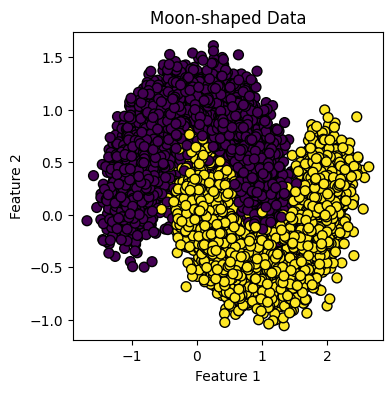

In [2]:
X, y = make_moons(n_samples=10000, noise=0.2, random_state=42)
X_sub, X_test, y_sub, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
# predict using a simple random forest model:
model = RandomForestClassifier(random_state=42)
model.fit(X_sub, y_sub)
y_predict_rf = model.predict(X_test)
print(f"Accuracy of Random Forest: {accuracy_score(y_predict_rf, y_test)}")

Accuracy of Random Forest: 0.9715


In [4]:
# predict using Conformal Predictor (simple method):
cp_simple = ConformalPredictor(model, method="Simple", random_state=42, calib_size=0.2, classwise=False)
cp_simple.fit(X_sub, y_sub)
p_values_simple = cp_simple.transform(X_test)
y_predict_cp_simple = cp_simple.predict(p_values_simple)
print(f"Accuracy of Conformal Predictor with simple method: {accuracy_score(y_predict_cp_simple, y_test)}")

Accuracy of Conformal Predictor with simple method: 0.9735


In [39]:
# predict using Conformal Predictor (KProx method):
cp_kprox = ConformalPredictor(model, method="KProx", random_state=42, calib_size=0.2, classwise=False, k=15)
cp_kprox.fit(X_sub, y_sub)
p_values_kprox = cp_kprox.transform(X_test)
y_predict_cp_kprox = cp_kprox.predict(p_values_kprox)
print(f"Accuracy of Conformal Predictor with kprox method: {accuracy_score(y_predict_cp_kprox, y_test)}")

Accuracy of Conformal Predictor with kprox method: 0.977


In [40]:
# Output prediction sets with 10% significance level (take prediction set of simple method as an example):
predict_sets_simple = cp_simple.predict_sets(p_values_simple, alpha=0.1)
correct_obs = 0
for i in range(len(predict_sets_simple)):
    if y_test[i] in predict_sets_simple[i]:
        correct_obs += 1
# print coverage rate
print(f"coverage rate : {correct_obs/len(predict_sets_simple)}")

coverage rate : 0.923


Multi-class classification using Venn-Abers Predictor :

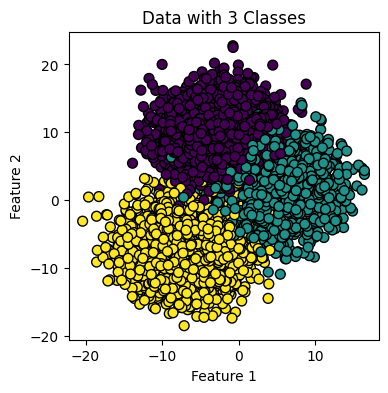

In [18]:
# Generate data with 3 classes
X, y = make_blobs(n_samples=10000, centers=3, cluster_std=3.5, random_state=42)
X_sub, X_test, y_sub, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title("Data with 3 Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [19]:
# predict using a simple random forest model:
model = RandomForestClassifier(random_state=42)
model.fit(X_sub, y_sub)
y_predict_rf = model.predict(X_test)
print(f"Accuracy of Random Forest: {accuracy_score(y_predict_rf, y_test)}")

Accuracy of Random Forest: 0.9195


In [20]:
# output probabilistic estimates of random forest model:
model.predict_proba(X_test)

array([[0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.88, 0.12, 0.  ]])

In [21]:
# predict using Venn-Abers predictor (OneVsRest strategy):
vap = VennAbersPredictor(model, inductive = True, random_state=42, calib_size=0.3, strategy='OneVsRest')
vap.fit(X_sub, y_sub)
predict_proba = vap.predict_proba(X_test)
# output calibrated probabilistic estimates:
print(predict_proba)



[[0.00608324 0.98971916 0.0041976 ]
 [0.00608324 0.98971916 0.0041976 ]
 [0.99025267 0.00553949 0.00420784]
 ...
 [0.00602404 0.00547223 0.98850373]
 [0.00608105 0.00552402 0.98839493]
 [0.86461732 0.13152248 0.0038602 ]]


In [22]:
y_predict_vap = vap.predict(X_test)
print(f"Accuracy of Venn-Abers Predictor: {accuracy_score(y_predict_vap, y_test)}")

Accuracy of Venn-Abers Predictor: 0.917


In [23]:
# predict using Venn-Abers predictor with cross-validation :
vap_cv = VennAbersPredictor(model, inductive =False, random_state=42, n_splits=3, shuffle=True, strategy='OneVsRest')
vap_cv.fit(X_sub, y_sub)
y_predict_vap_cv = vap_cv.predict(X_test)
print(f"Accuracy of Venn-Abers Predictor (CV): {accuracy_score(y_predict_vap_cv, y_test)}")


Accuracy of Venn-Abers Predictor: 0.9255
